In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("results_A_B.xlsx")

In [4]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [6]:
data.describe()

             userid  sum_gamerounds   retention_1   retention_7
count  9.018900e+04    90189.000000  90189.000000  90189.000000
mean   4.998412e+06       51.872457      0.445210      0.186065
std    2.883286e+06      195.050858      0.496992      0.389161
min    1.160000e+02        0.000000      0.000000      0.000000
25%    2.512230e+06        5.000000      0.000000      0.000000
50%    4.995815e+06       16.000000      0.000000      0.000000
75%    7.496452e+06       51.000000      1.000000      0.000000
max    9.999861e+06    49854.000000      1.000000      1.000000


In [7]:
data.sum_gamerounds.value_counts()

sum_gamerounds
1       5538
2       4606
0       3994
3       3958
4       3629
        ... 
858        1
1102       1
618        1
1027       1
708        1
Name: count, Length: 942, dtype: int64

In [8]:
data.retention_1.value_counts()

retention_1
0    50036
1    40153
Name: count, dtype: int64

In [9]:
data.retention_7.value_counts()

retention_7
0    73408
1    16781
Name: count, dtype: int64

In [11]:
data.userid.nunique()

90189

In [7]:
data.version.unique()

array(['gate_30', 'gate_40'], dtype=object)

In [8]:
data.nlargest(5, ['sum_gamerounds'])

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,0,1
7912,871500,gate_30,2961,1,1
29417,3271615,gate_40,2640,1,0
43671,4832608,gate_30,2438,1,1
48188,5346171,gate_40,2294,1,1


In [9]:
data = data[data.sum_gamerounds < 3000]

In [10]:
data.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018800e+04,90188.000000,90188.000000,90188.000000
mean,4.998397e+06,51.320253,0.445214,0.186056
std,2.883298e+06,102.682719,0.496992,0.389154
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512211e+06,5.000000,0.000000,0.000000
50%,4.995804e+06,16.000000,0.000000,0.000000
75%,7.496461e+06,51.000000,1.000000,0.000000
max,9.999861e+06,2961.000000,1.000000,1.000000


In [11]:
A = data.version.groupby(data.version == 'gate_30').count()
B = data.version.groupby(data.version == 'gate_40').count()
print(A)
print(B)

version
False    45489
True     44699
Name: version, dtype: int64
version
False    44699
True     45489
Name: version, dtype: int64


Число версий примерно одинаковы.  
Версия gate_30 будит называться контрольной группой A.  
Версия gate_40 будит называться тестовой группой B.

In [12]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [13]:
mannwhitneyu(data[data.version == 'gate_30'].sum_gamerounds,
             data[data.version == 'gate_40'].sum_gamerounds)

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.05089155279145376)

In [14]:
ttest_ind(data[data.version == 'gate_30'].sum_gamerounds,
          data[data.version == 'gate_40'].sum_gamerounds)

Ttest_indResult(statistic=0.0633675766982082, pvalue=0.9494739458256001)

In [15]:
from scipy.stats import kstest
print(kstest(data['sum_gamerounds'][data.version == 'gate_30'], 'norm'))
print(kstest(data['sum_gamerounds'][data.version == 'gate_40'], 'norm'))

KstestResult(statistic=0.8724153079945488, pvalue=0.0, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.8707186187388001, pvalue=0.0, statistic_location=2, statistic_sign=-1)


Text(0.5, 1.0, 'Number of game rounds players on the first week')

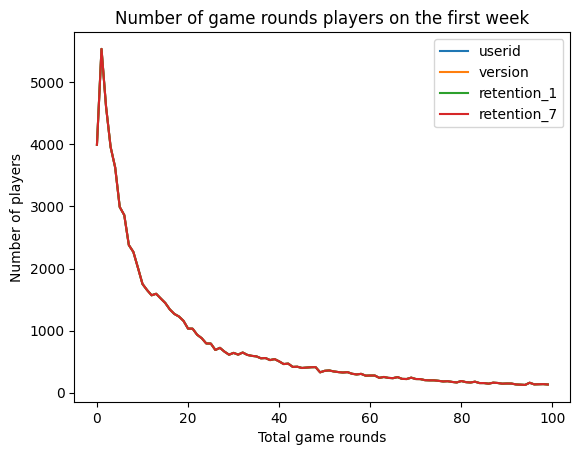

In [16]:
plot_data = data.groupby('sum_gamerounds').count()

ax = plot_data[:100].plot()
ax.set_xlabel('Total game rounds')
ax.set_ylabel('Number of players')
ax.set_title('Number of game rounds players on the first week')

График показывает, что большенство пользователей играет менее 20 раундов.

In [17]:
plt.style.use('ggplot')

Group_A = data[data.version == 'gate_30']
print(Group_A.head())

Group_B = data[data.version == 'gate_40']
print(Group_B.head())

bins = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500]
plot_GA = pd.DataFrame(Group_A.groupby(pd.cut(Group_A['sum_gamerounds'],
                                              bins=bins)).count())
plot_GB = pd.DataFrame(Group_B.groupby(pd.cut(Group_B['sum_gamerounds'],
                                              bins=bins)).count())

    userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3            0            0
1      337  gate_30              38            1            0
6     1066  gate_30               0            0            0
11    2101  gate_30               0            0            0
13    2179  gate_30              39            1            0
   userid  version  sum_gamerounds  retention_1  retention_7
2     377  gate_40             165            1            0
3     483  gate_40               1            0            0
4     488  gate_40             179            1            1
5     540  gate_40             187            1            1
7    1444  gate_40               2            0            0


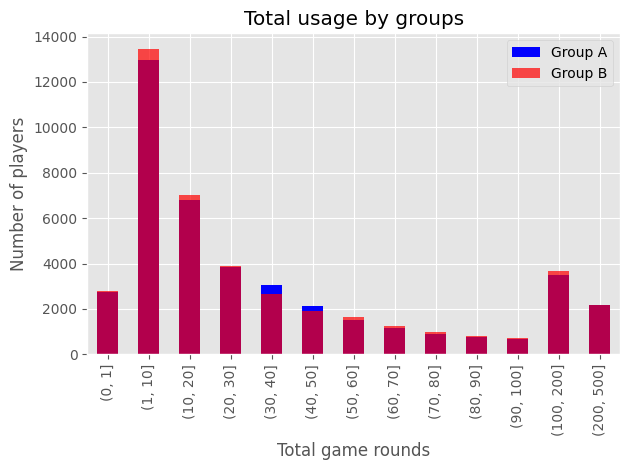

In [18]:
ax = plot_GA.plot(kind = 'bar', y='userid', color = 'blue', alpha = 1,
                  title = 'Total usage by groups')
plot_GB.plot(kind = 'bar', y = 'userid', ax = ax, color = 'red', alpha = 0.7)
ax.set_xlabel('Total game rounds')
ax.set_ylabel('Number of players')
plt.legend(['Group A', 'Group B'])
plt.tight_layout()
plt.grid(True)

Гафик показывает, что между двумя версиями вообщем нет большой разници.  
Небольшие различия есть в пределах 30 - 40 сыгранных раундов

Обе версии имеют практически одинаковые результаты.  
Четково ответа стоит ли применять изменение мы не получили. 

Рекомендуется продолжить тестирование и провести дальнейшие эксперименты с целью оптимизации игрового процесса, повышения вовлеченности пользователей и монетизации.